<a href="https://colab.research.google.com/github/stephenebert/Springboard/blob/main/Mini_Project_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [NYC Taxi Data Analysis](https://github.com/springboard-curriculum/mec2-projects/blob/main/Student_MLE_MiniProject_EDA.ipynb)

Import relevant packages



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Part 1**

**1. Load the yellow_tripdata_2022-01.parquet file into Pandas**

In [4]:
df = pd.read_parquet('yellow_tripdata_2022-01.parquet')

**2. Print the first 5 rows of data**

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


**3. How many rows are in the dataset? How many unique columns are in the dataset?**

In [6]:
df.shape

(2463931, 19)

There are **2463931 rows** and **19 columns**. Here we used the .shape to get this attribute (rows, columns), but there could be duplicates

We see it doesn't matter for this example, but, to be extra safe, we will use the .unique() method to arrive at the same answer

In [7]:
len(df.columns.unique()) #First we extract the columns, use the .unique() method to filter duplicates, then print the number of unique columns

19

In [8]:
len(df) #rows

2463931

**4. Which columns have NULL values and how many NULL values are present in each of these columns?**

In [9]:
df.isnull().sum()

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,71503
trip_distance,0
RatecodeID,71503
store_and_fwd_flag,71503
PULocationID,0
DOLocationID,0
payment_type,0


There are five columns that have null values are "**passenger_count**", "**RatecodeID**", "**store_and_fwd_flag**", "**congestion_surcharge**", and "**airport_fee**". There are **71503** null values present for each of these five columns.

The other fourteen columns have no null values as you can see

**5. Generate summary statistics using Pandas' describe method. Do you notice anything unusual in the dataset? Find at least one anomoly and try to come up with a hypothesis to explain it.**

In [10]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2.463931e+06,2463931,2463931,2.392428e+06,2.463931e+06,2.392428e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.463931e+06,2.392428e+06,2.392428e+06
mean,1.707819e+00,2022-01-17 01:19:51.689724,2022-01-17 01:34:04.421902,1.389453e+00,5.372751e+00,1.415507e+00,1.660768e+02,1.635807e+02,1.194449e+00,1.294648e+01,1.006710e+00,4.914539e-01,2.385696e+00,3.749773e-01,2.967234e-01,1.916937e+01,2.282322e+00,8.249935e-02
min,1.000000e+00,2008-12-31 22:23:09,2008-12-31 23:06:56,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.800000e+02,-4.500000e+00,-5.000000e-01,-1.252200e+02,-3.140000e+01,-3.000000e-01,-4.803000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-01-09 15:37:41,2022-01-09 15:50:50.500000,1.000000e+00,1.040000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,7.200000e-01,0.000000e+00,3.000000e-01,1.130000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-01-17 12:11:45,2022-01-17 12:23:49,1.000000e+00,1.740000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,1.469000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-01-24 13:49:37.500000,2022-01-24 14:02:51,1.000000e+00,3.130000e+00,1.000000e+00,2.340000e+02,2.360000e+02,1.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,3.000000e+00,0.000000e+00,3.000000e-01,2.002000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2022-05-18 20:41:57,2022-05-18 20:47:45,9.000000e+00,3.061593e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.659000e+01,8.888800e+02,1.933000e+02,3.000000e-01,4.010956e+05,2.500000e+00,1.250000e+00
std,5.021375e-01,NaN,NaN,9.829686e-01,5.478714e+02,5.917573e+00,6.546806e+01,7.079016e+01,5.001778e-01,2.558149e+02,1.236226e+00,8.291560e-02,2.830698e+00,1.680538e+00,4.374741e-02,2.559641e+02,7.432040e-01,3.125554e-01


Yeah, there’s something odd in the dataset. For example, the columns for "fare_amount", "mta_tax", "tip_amount", "tolls_amount", and "airport_fee" contain negative values which is unexpected. These are all charges that should be positive or zero, not negative. It could be a typo, a system bug, or maybe a refund that wasn’t recorded properly. A good next step might be to either leave those rows out of the analysis or, if possible, try to get a cleaner version of the data.

**6. Drop all rows with NULL values and store the result. We'll ignore NULL valued rows in this mini-project.**

In [11]:
df_filter = df.dropna()

In [12]:
#We can see this works by either looking at the data directly or the shape reduction
print(df_filter.head())
print(f'{df.shape} -drop nulls-> {df_filter.shape}')

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


**Part 2**

**1. Create a new feature that calculates the trip duration in minutes.**

Since we are dealing with time, it is convenient to use the datetime data structure so we can just take the difference between times.

Also, according to the problem statement, it says to ignore all null values so we will just use the df_filter DataFrame

In [13]:
df_filter.loc[:, 'tpep_pickup_datetime'] = pd.to_datetime(df_filter['tpep_pickup_datetime'])
df_filter.loc[:, 'tpep_dropoff_datetime'] = pd.to_datetime(df_filter['tpep_dropoff_datetime'])

Now we define a new column called "trip_duration_in_minutes"

In [14]:
df_filter = df.copy()
df_filter.loc[:, 'trip_duration_in_minutes'] = (
    df_filter['tpep_dropoff_datetime'] - df_filter['tpep_pickup_datetime']
).dt.total_seconds() / 60

In [15]:
df_filter[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration_in_minutes']] #nice to see this indeed works :)

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration_in_minutes
0,2022-01-01 00:35:40,2022-01-01 00:53:29,17.816667
1,2022-01-01 00:33:43,2022-01-01 00:42:07,8.400000
2,2022-01-01 00:53:21,2022-01-01 01:02:19,8.966667
3,2022-01-01 00:25:21,2022-01-01 00:35:23,10.033333
4,2022-01-01 00:36:48,2022-01-01 01:14:20,37.533333
...,...,...,...
2463926,2022-01-31 23:36:53,2022-01-31 23:42:51,5.966667
2463927,2022-01-31 23:44:22,2022-01-31 23:55:01,10.650000
2463928,2022-01-31 23:39:00,2022-01-31 23:50:00,11.000000
2463929,2022-01-31 23:36:42,2022-01-31 23:48:45,12.050000


**2. Create additional features for the pick-up day of week and pick-up hour.**

In [16]:
df_filter.loc[:, 'pickup_dayofweek'] = df_filter['tpep_pickup_datetime'].dt.dayofweek
df_filter.loc[:, 'pickup_hour'] = df_filter['tpep_pickup_datetime'].dt.hour
df_filter[['tpep_pickup_datetime', 'pickup_dayofweek', 'pickup_hour']]

,tpep_pickup_datetime,pickup_dayofweek,pickup_hour
0,2022-01-01 00:35:40,5,0
1,2022-01-01 00:33:43,5,0
2,2022-01-01 00:53:21,5,0
3,2022-01-01 00:25:21,5,0
4,2022-01-01 00:36:48,5,0
...,...,...,...
2463926,2022-01-31 23:36:53,0,23
2463927,2022-01-31 23:44:22,0,23
2463928,2022-01-31 23:39:00,0,23
2463929,2022-01-31 23:36:42,0,23


**3. Use the Seaborn library to create a line plot depicting the number of trips as a function of the hour of day. What's the busiest time of day?**

In [17]:
df_filter['pickup_hour'].head() #since we want the hours, we should go to the hours column

,pickup_hour
0,0
1,0
2,0
3,0
4,0


In [18]:
print(df_filter['pickup_hour'].value_counts())
print(df_filter['pickup_hour'].value_counts().values)
#.value_counts() method is a series that counts the number of unique times a value appears. Extract their values which will be our y coordinate. The x coordinate is the time i.e. this column's index which we use the .index attribute

pickup_hour
18    177696
17    176701
15    174416
16    168564
14    163858
19    151346
13    147878
12    142216
11    129561
10    119816
20    117997
21    109627
9     109376
22    104649
8     101528
23     80209
7      74137
0      60065
1      42313
6      36206
2      29193
3      19308
5      14443
4      12828
Name: count, dtype: int64
[177696 176701 174416 168564 163858 151346 147878 142216 129561 119816
 117997 109627 109376 104649 101528  80209  74137  60065  42313  36206
  29193  19308  14443  12828]


In [19]:
df_filter['pickup_hour'].value_counts().index #0-23 as expected

Index([18, 17, 15, 16, 14, 19, 13, 12, 11, 10, 20, 21,  9, 22,  8, 23,  7,  0,
        1,  6,  2,  3,  5,  4],
      dtype='int32', name='pickup_hour')

We are ready to plot these two arrays df_filter['pickup_hour'].value_counts().index and df_filter['pickup_hour'].value_counts().values

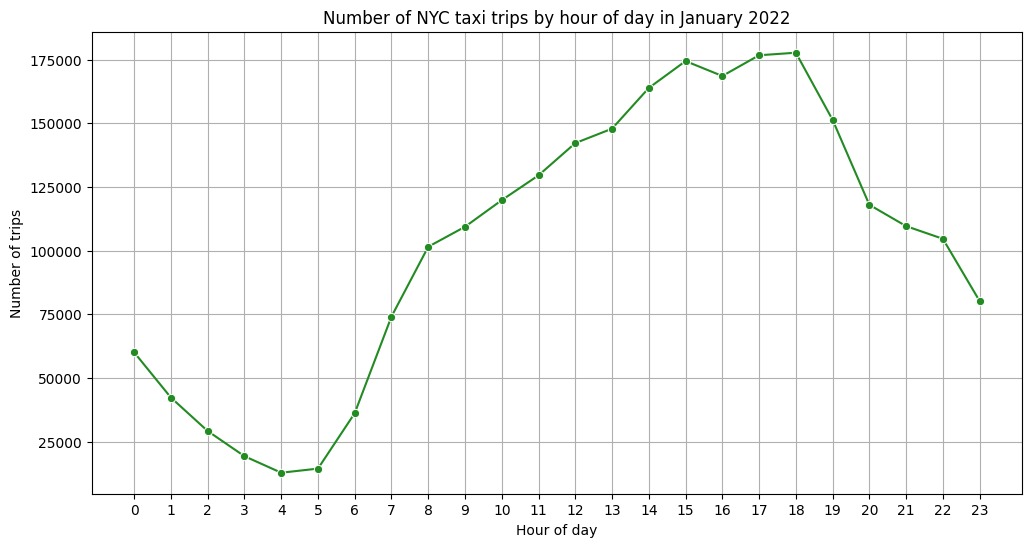

In [20]:
counts_by_hour = df_filter['pickup_hour'].value_counts()
plt.figure(figsize=(12, 6)) #I decided to stretch it out for more room and also looks better
sns.lineplot(x=counts_by_hour.index, y=counts_by_hour.values, marker='o', color = 'forestgreen')
plt.title('Number of NYC taxi trips by hour of day in January 2022')
plt.xlabel('Hour of day')
plt.ylabel('Number of trips')
plt.xticks(range(24)) #since we have data for every hour, it is more visually appealing to have this
plt.grid(True)
plt.show()

From looking at the graph and data, we see that **18:00** or 6:00 pm which makes sense since this is typically dinner time. We can also find the max value's index with the .idxmax() method

In [21]:
print(f"Busiest hour of the day is: {counts_by_hour.idxmax()}:00 which has this number of trips: {counts_by_hour.max()}")

Busiest hour of the day is: 18:00 which has this number of trips: 177696


**4. Create another lineplot depicting the number of trips as a function of the day of week. What day of the week is the least busy?**

In [22]:
print(df_filter['pickup_dayofweek'].value_counts().values)
print(df_filter['pickup_dayofweek'].value_counts().index)

[374034 366297 362358 355413 343361 338341 324127]
Index([0, 5, 4, 3, 6, 2, 1], dtype='int32', name='pickup_dayofweek')


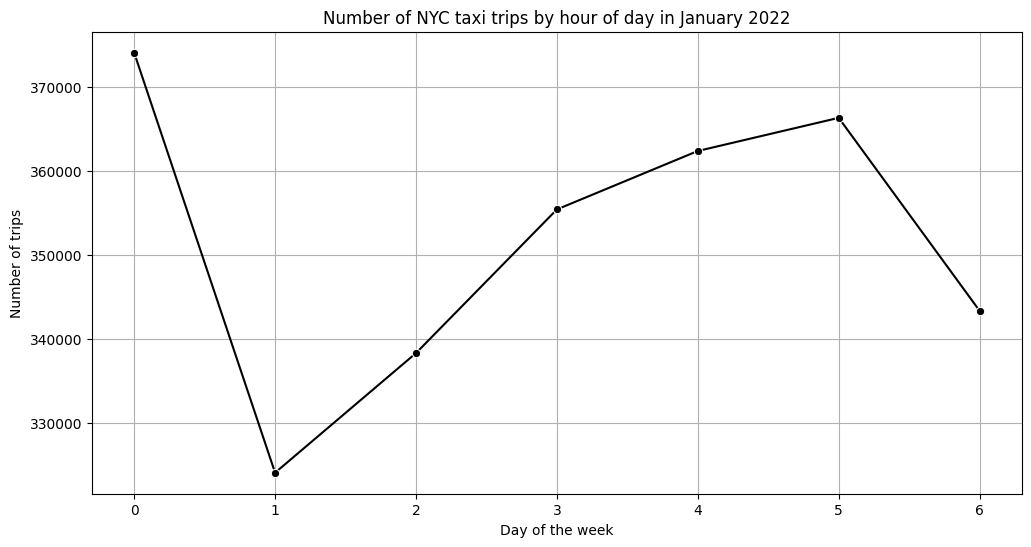

Least busy day of the week is: Tuesday which has this number of trips: 324127


In [23]:
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

counts_by_week = df_filter['pickup_dayofweek'].value_counts()
plt.figure(figsize=(12, 6))
sns.lineplot(x=counts_by_week.index, y=counts_by_week.values, marker='o', color = 'black')
plt.title('Number of NYC taxi trips by hour of day in January 2022')
plt.xlabel('Day of the week')
plt.ylabel('Number of trips')
plt.grid(True)
plt.show()
print(f"Least busy day of the week is: {days[counts_by_week.idxmin()]} which has this number of trips: {counts_by_week.min()}")

We can clearly see the answer is **Tuesday** to be the least busy day of the week

**Part 3**

**1. Compute a correlation matrix between the variables 'trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration' and use Seaborn to create a heatmap of the results. Which variables are strongly correlated?**

In [24]:
correlation = df_filter[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration_in_minutes']].corr()
print(correlation)
#correlation matrix corr(x, y) = cov(x, y)/ (\sigma_x * \sigma_y) = ( E(x*y)- E(x)*E(y) ) / (\sigma_x * \sigma_y)
#.corr() goes through all possible combinations

                          trip_distance  fare_amount  tip_amount  \
trip_distance                  1.000000     0.000406    0.005931   
fare_amount                    0.000406     1.000000    0.024442   
tip_amount                     0.005931     0.024442    1.000000   
total_amount                   0.000505     0.999875    0.038569   
trip_duration_in_minutes       0.001458     0.008365    0.086403   

                          total_amount  trip_duration_in_minutes  
trip_distance                 0.000505                  0.001458  
fare_amount                   0.999875                  0.008365  
tip_amount                    0.038569                  0.086403  
total_amount                  1.000000                  0.009962  
trip_duration_in_minutes      0.009962                  1.000000  


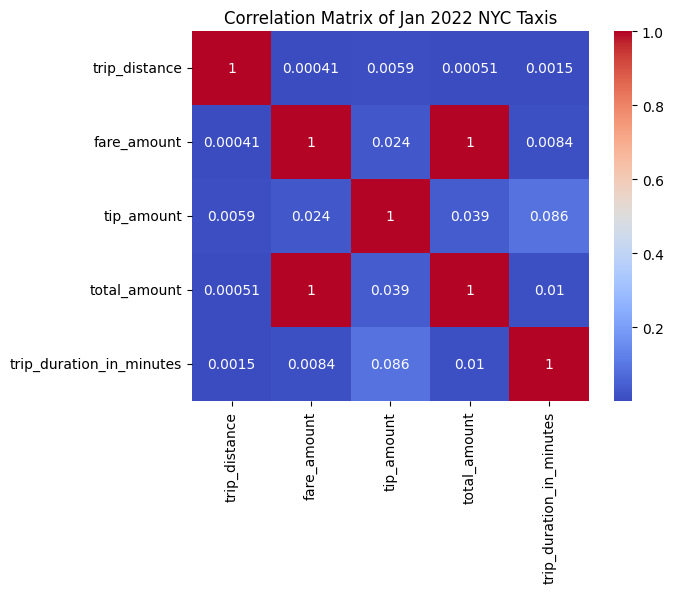

In [25]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Jan 2022 NYC Taxis')
plt.show()

As seen from the heat map, or in the previous cell by just looking the correlation matrix directly with just .corr(), we see that the strongest correlation is **'fare_amount'** and **'total_amount'** by the bright red. A correlation of 1 indicates a *perfect*, positive linear relationship between two variables. Second largest that are not self-correlated goes to 'tip_amount' and 'trip_distance' with correlation of 0.49

**Part 4**

**1. Create a pairplot matrix using Seaborn to observation the relationship between the following variables: trip_distance, fare_amount, tip_amount, total_amount, trip_duration. Note, pairplots can be memory intensive. Try sampling the dataset using the sample method in Pandas. Which variables appear to have a strong relationship? Which variables seem to have no relationship?**

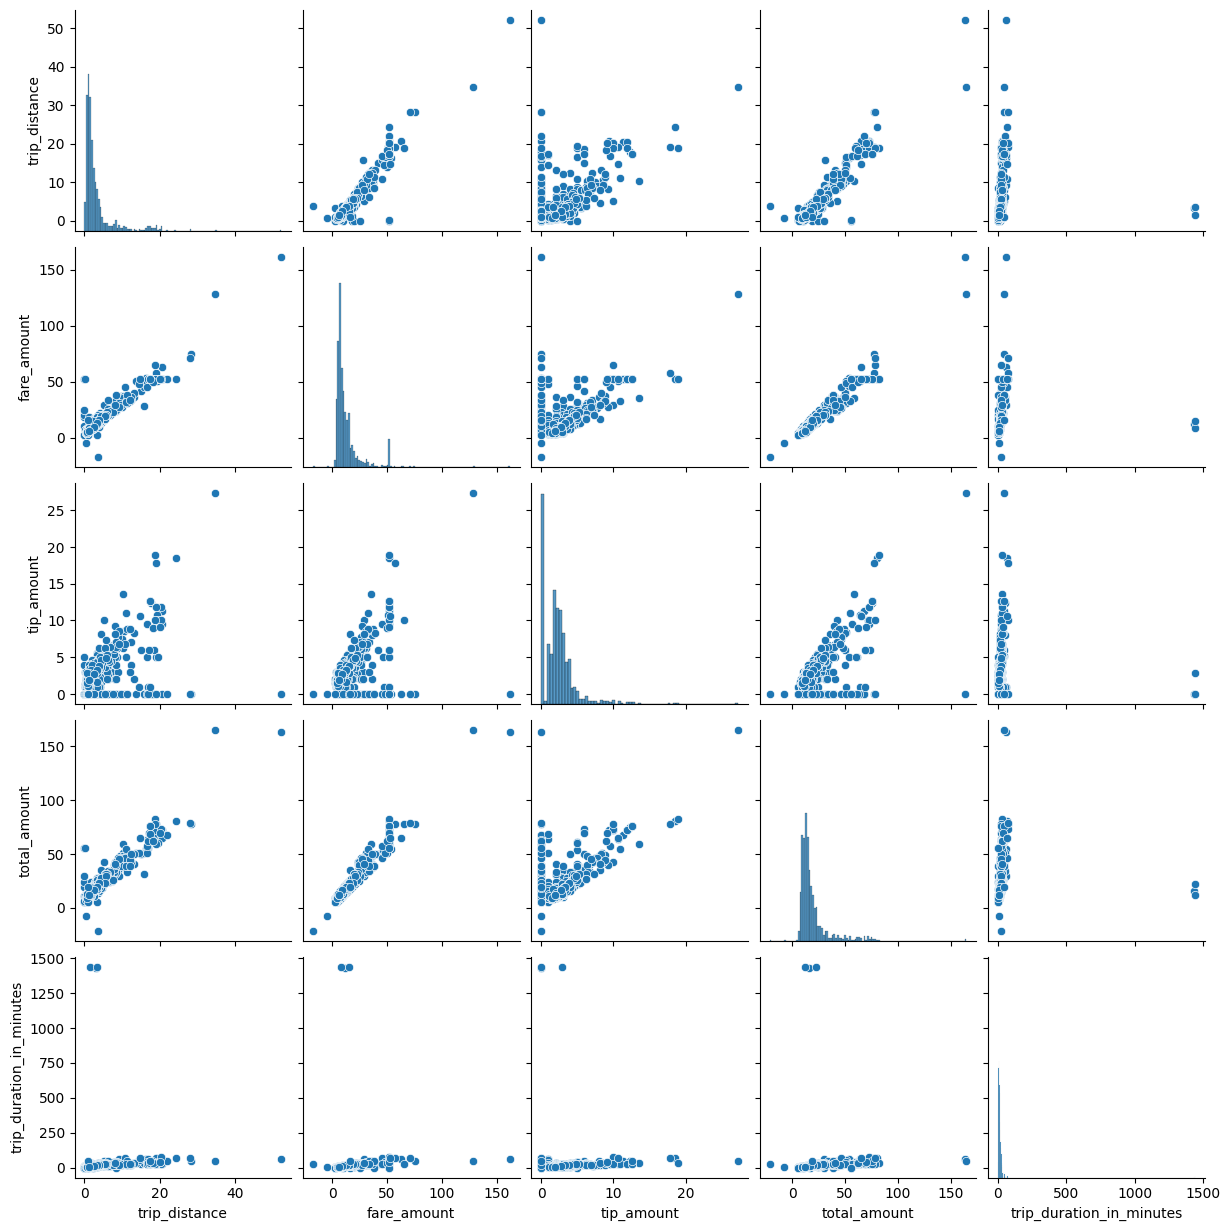

In [26]:
sns.pairplot(df_filter[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration_in_minutes']].sample(1000))
plt.show()

**'trip_distance' vs. 'fare_amount'** and **'total_amount' vs. 'fare_amount'** are examples with **strong **relationships or strong correlations. These relationships makes sense since the   longer trips cost more, and take more time.

No relationships or **no** correlations are, for example, **'trip_duration_in_minutes' vs. 'tip_amount'** or **'trip_distance' vs. 'fare_amount'** or **'fare_amount' vs. 'tip_amount'**


In [27]:
cols = ['trip_distance','fare_amount','tip_amount','total_amount', 'trip_duration_in_minutes']
df_filter[cols].corr()


,trip_distance,fare_amount,tip_amount,total_amount,trip_duration_in_minutes
trip_distance,1.000000,0.000406,0.005931,0.000505,0.001458
fare_amount,0.000406,1.000000,0.024442,0.999875,0.008365
tip_amount,0.005931,0.024442,1.000000,0.038569,0.086403
total_amount,0.000505,0.999875,0.038569,1.000000,0.009962
trip_duration_in_minutes,0.001458,0.008365,0.086403,0.009962,1.000000


**Part 5**

**1. Use Seaborn to create a countplot for the variables PULocationID, and DOLocationID. Keep only the top 15 pick-up and drop-off locations. What's the most popular pick-up location?**

In [51]:
top15_pickup = df_filter['PULocationID'].value_counts().head(15).index
top15_dropoff = df_filter['DOLocationID'].value_counts().head(15).index
print(top15_pickup, top15_dropoff)

Index([237, 236, 132, 161, 186, 142, 141, 48, 239, 170, 162, 230, 163, 79,
       234],
      dtype='int64', name='PULocationID') Index([236, 237, 141, 239, 161, 170, 142, 48, 238, 263, 140, 229, 68, 230,
       162],
      dtype='int64', name='DOLocationID')


In [52]:
df_top_pickup = df_filter[df_filter['PULocationID'].isin(top15_pickup)]
df_top_dropoff = df_filter[df_filter['DOLocationID'].isin(top15_dropoff)]

In [80]:
# Count values for the top 15 pickup and dropoff locations

pickup_counts = df_filter['PULocationID'].value_counts()
dropoff_counts = df_filter['DOLocationID'].value_counts()

top15_pickup = pickup_counts.head(15)
top15_dropoff = dropoff_counts.head(15)

#These are pandas series, we should convert them into a dataframe
print(top15_pickup)
print(top15_dropoff)


PULocationID
237    121630
236    120814
132    103485
161     88237
186     80580
142     80187
141     77192
48      77003
239     75563
170     75486
162     74529
230     68814
163     64217
79      64184
234     64169
Name: count, dtype: int64
DOLocationID
236    123470
237    106355
141     78341
239     75050
161     74707
170     73746
142     70431
48      68292
238     65510
263     61105
140     59381
229     57524
68      57242
230     57230
162     57211
Name: count, dtype: int64


In [101]:
pick_up_dictionary = {
    'LocationID': top15_pickup.index,
    'count': top15_pickup.values,
    'type': 'Pickup'
}

drop_off_dictionary = {
    'LocationID': top15_dropoff.index,
    'count': top15_dropoff.values,
    'type': 'Dropoff'
}

#convert these dictionaries into a data frame
df_pickup = pd.DataFrame(pick_up_dictionary)
df_dropoff = pd.DataFrame(drop_off_dictionary)

In [95]:
df_pickup

,LocationID,count,type
0,237,121630,Pickup
1,236,120814,Pickup
2,132,103485,Pickup
3,161,88237,Pickup
4,186,80580,Pickup
5,142,80187,Pickup
6,141,77192,Pickup
7,48,77003,Pickup
8,239,75563,Pickup
9,170,75486,Pickup


In [96]:
df_dropoff

,LocationID,count,type
0,236,123470,Dropoff
1,237,106355,Dropoff
2,141,78341,Dropoff
3,239,75050,Dropoff
4,161,74707,Dropoff
5,170,73746,Dropoff
6,142,70431,Dropoff
7,48,68292,Dropoff
8,238,65510,Dropoff
9,263,61105,Dropoff


In [97]:
df_combined = pd.concat([df_pickup, df_dropoff])
df_combined

,LocationID,count,type
0,237,121630,Pickup
1,236,120814,Pickup
2,132,103485,Pickup
3,161,88237,Pickup
4,186,80580,Pickup
5,142,80187,Pickup
6,141,77192,Pickup
7,48,77003,Pickup
8,239,75563,Pickup
9,170,75486,Pickup


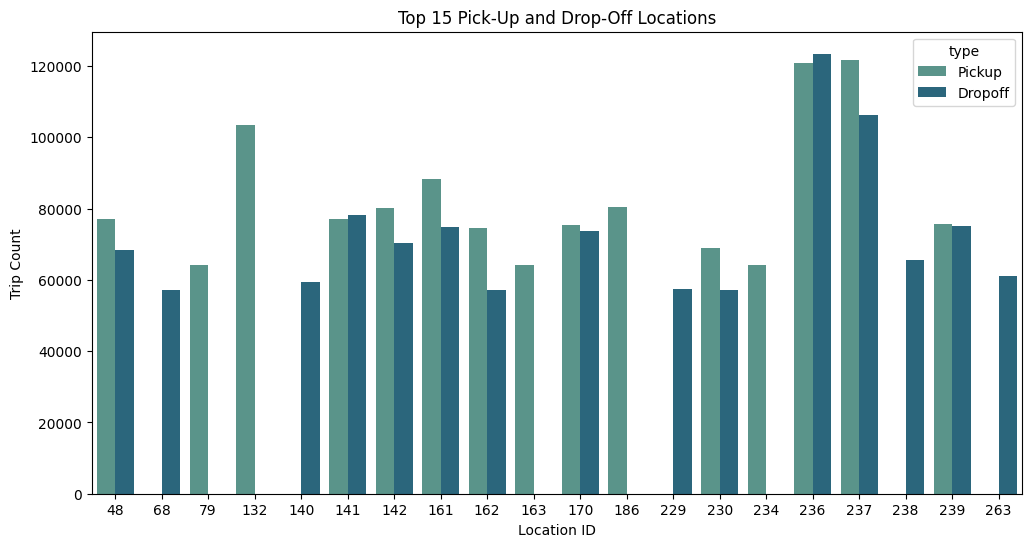

In [100]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_combined, x='LocationID', y='count', hue='type', palette='crest') #seaborn is smart enough to distinguish the dataframe's type pickup / dropoff with the hue
plt.title('Top 15 Pick-Up and Drop-Off Locations')
plt.xlabel('Location ID')
plt.ylabel('Trip Count')
plt.show()

As we can see directly from the data or the seaborn barplot above, the most popular pickup is location ID **237** which has trip count of 121630.

**Part 6**

**1. Use Seaborn's boxplot to discern the relationship between payment_type and total_amount. Does anything look weird? Can you explain what's going on?**

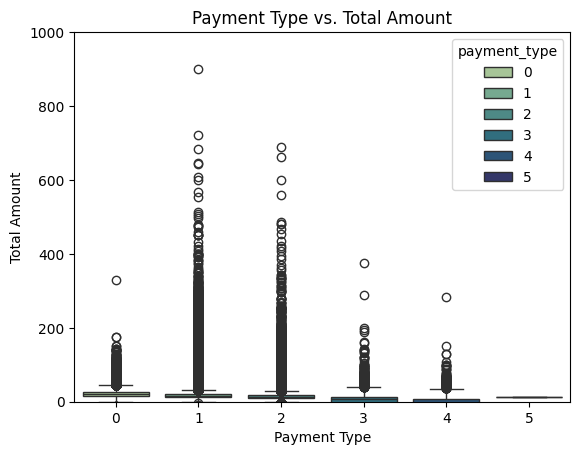

In [122]:
sns.boxplot(data=df_filter, x='payment_type', y='total_amount', hue = 'payment_type', palette='crest')
plt.title('Payment Type vs. Total Amount')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount')
plt.ylim(0, 1000) #I noticed without this limit, it is harder to interpret the box plot
plt.show()

According to the official  [NYC TLC trip record data dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf), the 'payment_type' column has a documented numeric code:

0 = Flex Fare trip

1 = Credit card

2 = Cash

3 = No charge

4 = Dispute

5 = Unknown

From the boxplot of total_amount by payment_type, two things stand out as unusual:

First are **Payment Type 3 (No Charge)** and **Payment Type 4 (Dispute)**. "No charge" means free and "dispute" means the fare was probably refunded. Both show a number of trips with total amounts well above $\$100$. A No Charge fare is supposed to be free. A "Dispute" indicates the fare was contested and likely refunded. We are expected the total amount should be close or near $0.

Second are the **extremely high total amounts** $> \$900$ appear across some payment types. This is highly unusual for NYC taxi trips ... even accounting for flat rates and surcharges. These could be due to innocent typos (e.g. an extra zero), system glitches, or misclassified rides from other services. These apparent anomalies or logical/statistical outliers should be reviewed and clarified, especially before doing any analysis that assumes clean fare distributions.

**Part 7**

**1. Use Seaborn's histplot to explore the data distributions for fare_amount, trip_distance, and extra. Use kernel density estimators to better visualize the distribution. Use sampling if you run into any memory issues.**

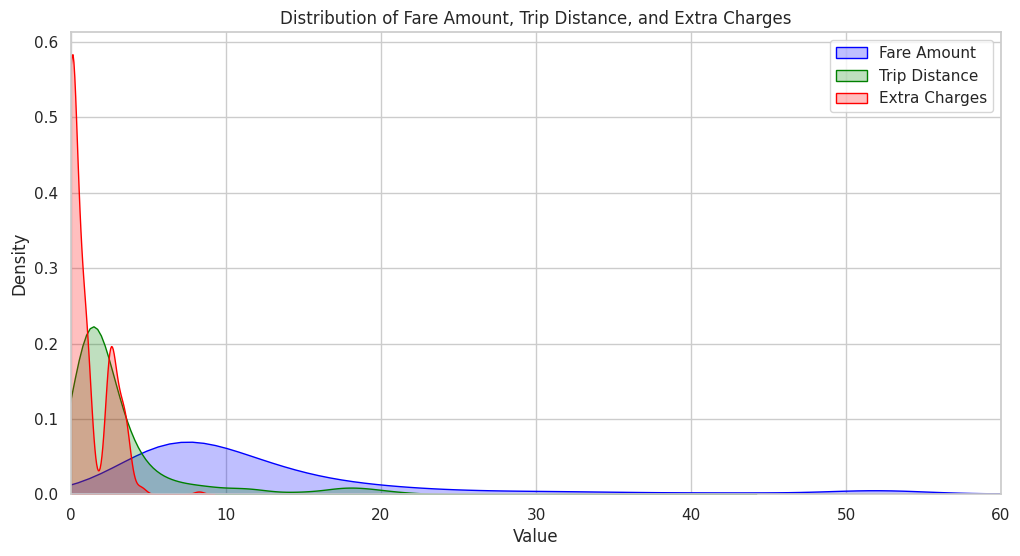

In [155]:
df_sample = df_filter.sample(n=1000, random_state=1000)
plt.figure(figsize=(12, 6))

#I used this kernel density estimator https://seaborn.pydata.org/generated/seaborn.kdeplot.html

sns.kdeplot(df_sample['fare_amount'], label='Fare Amount', fill=True, color='blue')
sns.kdeplot(df_sample['trip_distance'], label='Trip Distance', fill=True, color='green')
sns.kdeplot(df_sample['extra'], label='Extra Charges', fill=True, color='red')

plt.title('Distribution of Fare Amount, Trip Distance, and Extra Charges')
plt.xlabel('Value')
plt.ylabel('Density')
plt.xlim(0,60)
plt.legend()
plt.grid(True)
plt.show()
